In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df1 = pd.read_csv('./complex_20230308.csv', header=None)
df1.columns = ['old_addr_idx', 'complex_name', 'property_type','시도','시군구',
               '읍면동','리','road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub','updated']

df2 = pd.read_csv('./property_20230308.csv', header=None)
df2.columns = ['pk','old_addr_idx','dong','ho','official_price','net_leasable_area','updated']

df_tot = df2.merge(df1, on='old_addr_idx')

df_apt_tot = df_tot[df_tot['property_type']=='apartment']

pd.options.display.max_columns = None
df_apt_tot['평수'] = df_apt_tot['net_leasable_area'] / 3.3



<ipython-input-1-8b46db381b17>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['평수'] = df_apt_tot['net_leasable_area'] / 3.3


In [2]:
ranges = [(0, 10, '10평 미만'), (10, 20, '10평대'), (20, 30, '20평대'), (30, 40, '30평대'), (40,50,'40평대'), (50,60,'50평대'),(60,70,'60평대'),(70,80,'70평대'),(80,90,'80평대'),(90,170,'90평 이상')]

labels = [r[2] for r in ranges]
bins = [r[0] for r in ranges] + [ranges[-1][1]]

df_apt_tot['평형'] = pd.cut(df_apt_tot['평수'], bins=bins, labels=labels, include_lowest=True, right=False)

<ipython-input-2-91ef7fbc1f28>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_tot['평형'] = pd.cut(df_apt_tot['평수'], bins=bins, labels=labels, include_lowest=True, right=False)


In [3]:


sido_list = df_apt_tot['시도'].unique()
sido_list

array(['서울특별시', '부산광역시', '인천광역시', '경기도', '강원도', '충청북도', '세종특별자치시',
       '대전광역시', '충청남도', '전라북도', '광주광역시', '전라남도', '대구광역시', '경상북도', '경상남도',
       '울산광역시', '제주특별자치도'], dtype=object)

<ipython-input-10-2fb2f5768f7b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


서울특별시 평형별 데이터 수
       평형   counts
2  10평 미만   351711
0    10평대  1106753
1    20평대   863513
3    30평대   228457
4    40평대    78778
5    50평대    20479
6    60평대     7729
7    70평대     4501
8    80평대      389
9  90평 이상       49


<ipython-input-10-2fb2f5768f7b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


부산광역시 평형별 데이터 수
       평형  counts
2  10평 미만  116742
1    10평대  380142
0    20평대  436820
3    30평대   83377
4    40평대   40497
5    50평대    7906
6    60평대    1695
7    70평대     526
8    80평대      23
9  90평 이상       0


<ipython-input-10-2fb2f5768f7b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


인천광역시 평형별 데이터 수
       평형  counts
3  10평 미만   50065
0    10평대  477029
1    20평대  319743
2    30평대   72349
4    40평대   20526
5    50평대    2196
6    60평대     344
7    70평대      65
8    80평대      29
9  90평 이상       0


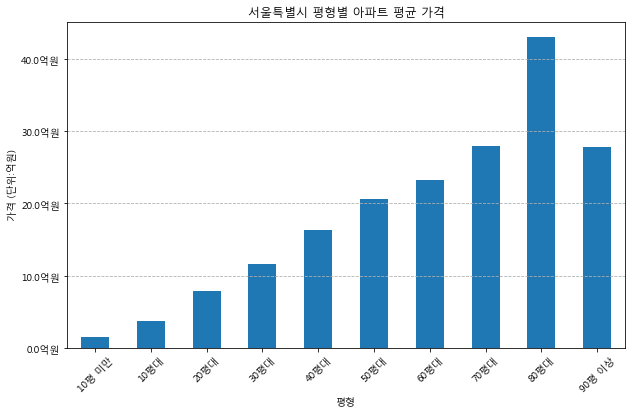

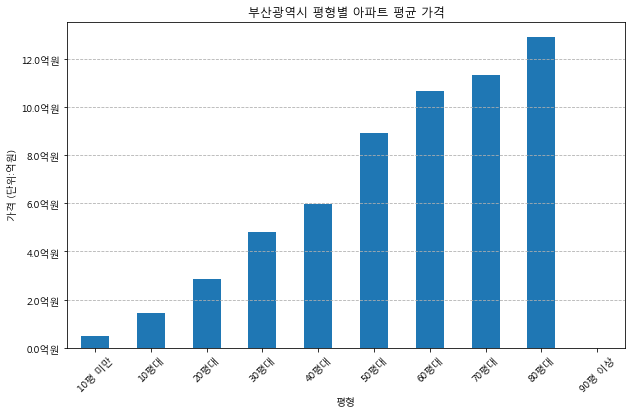

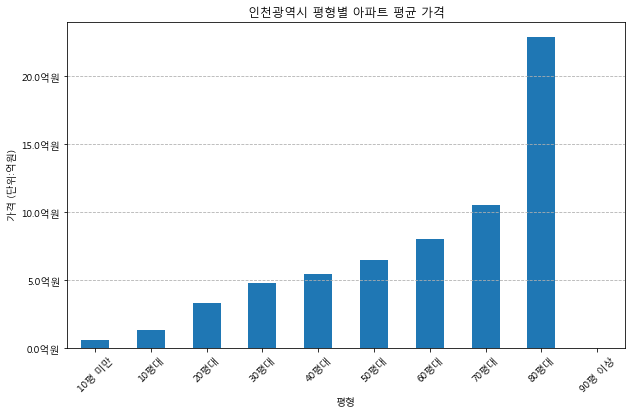

In [10]:
k=0
while k<3:
    df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()
    
    pd.set_option('display.float_format', lambda x: f'{x:,.0f}')
    
    graph = df.plot(kind='bar', x='평형', y='official_price', width = 0.5, legend = None, figsize=(10,6))
    plt.rc('font', family="Malgun Gothic") 
    plt.title(sido_list[k]+' 평형별 아파트 평균 가격')
    plt.ylabel('가격 (단위:억원)')
    graph.xaxis.set_tick_params(rotation=45, labelsize=10)
    graph.grid(True, axis='y', linestyle='--')
    def millions(x, pos):
        'The two args are the value and tick position'
        return '{:.1f}억원'.format(x*1e-8)
    graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
    
    ex = df_apt_tot[df_apt_tot['시도'] == sido_list[k]]
    print(sido_list[k]+' 평형별 데이터 수')
    a = ex['평형'].value_counts()
    a_ex = pd.DataFrame({'평형': a.index, 'counts': a.values})
    new_df = a_ex.sort_values('평형')

    print(new_df)
    
    #plt.savefig(sido_list[k]+'평형별', format='jpeg', dpi=300)
    
    k=k+1

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


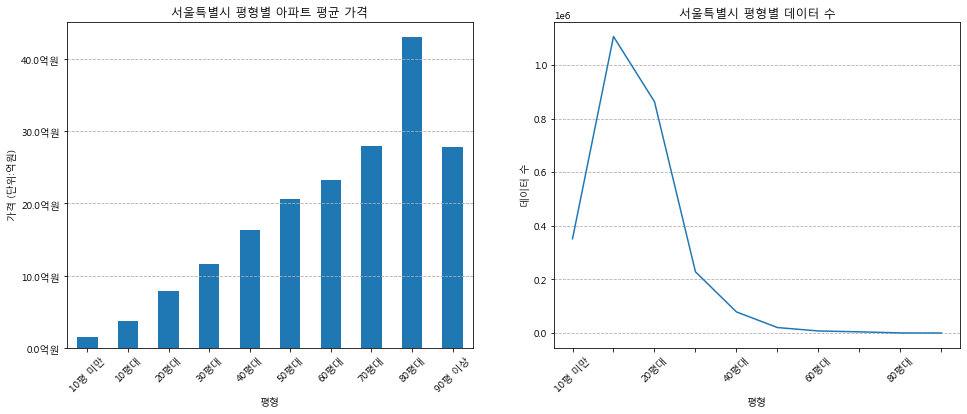

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


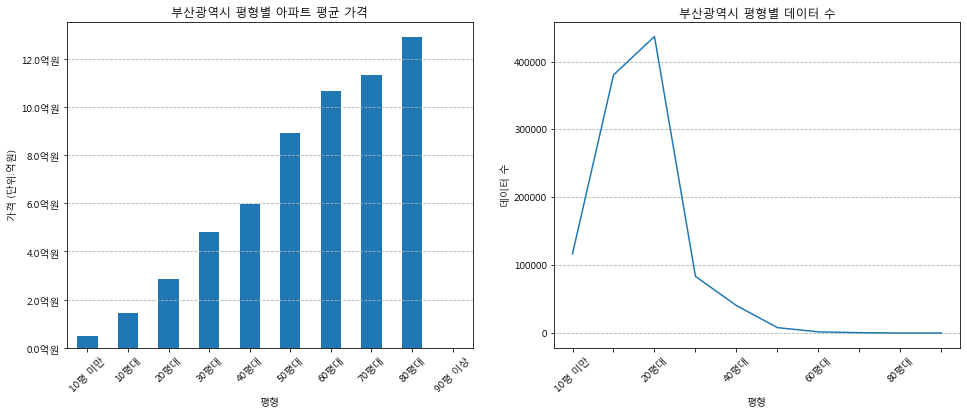

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


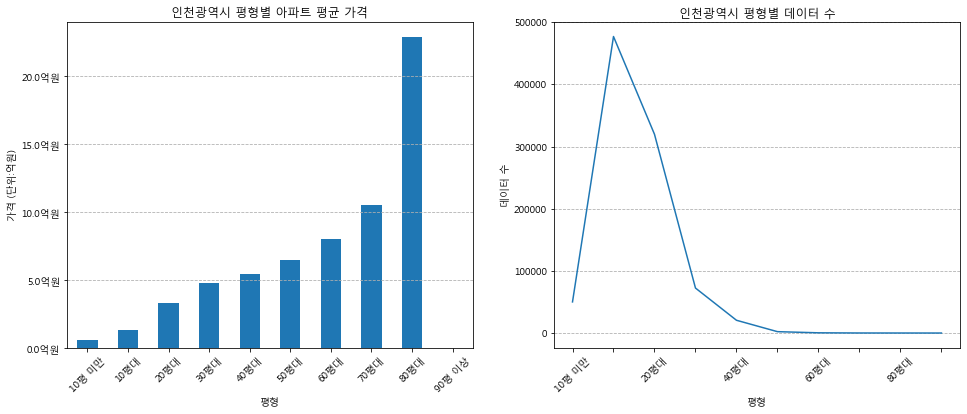

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


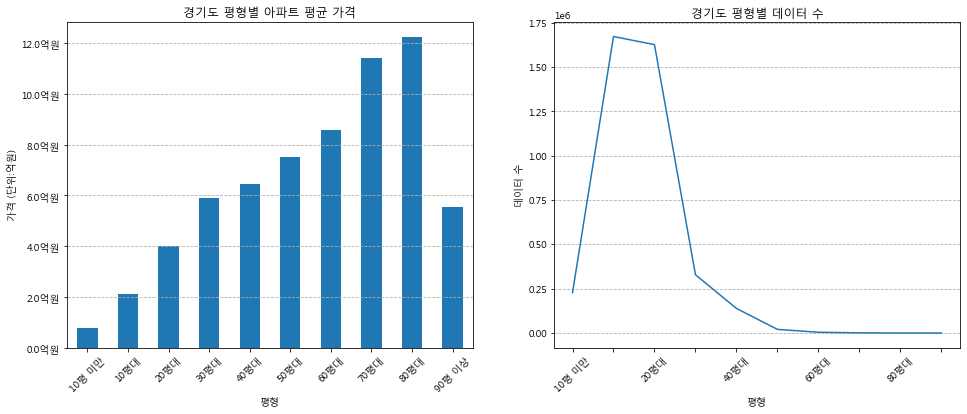

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


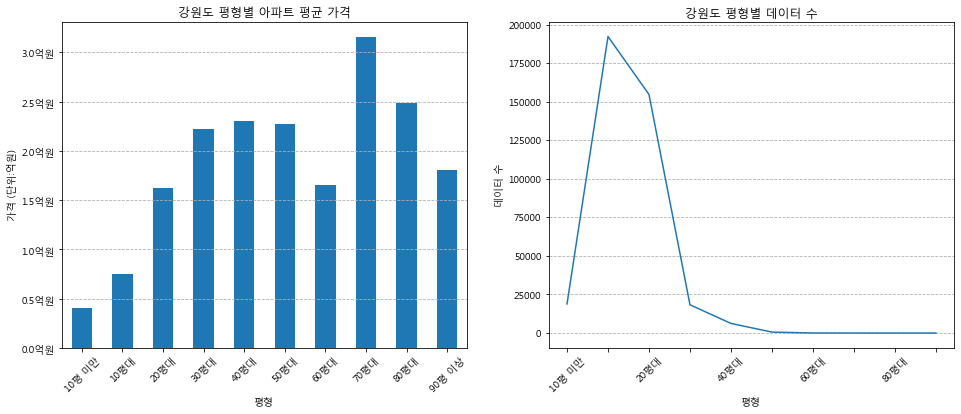

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


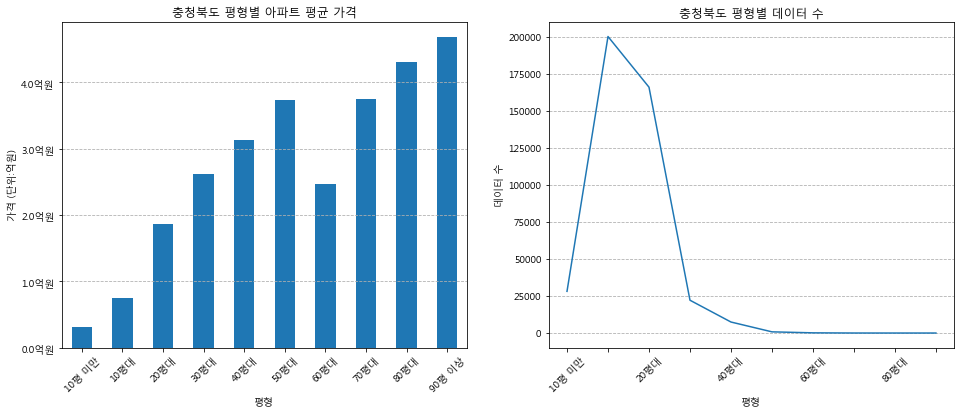

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


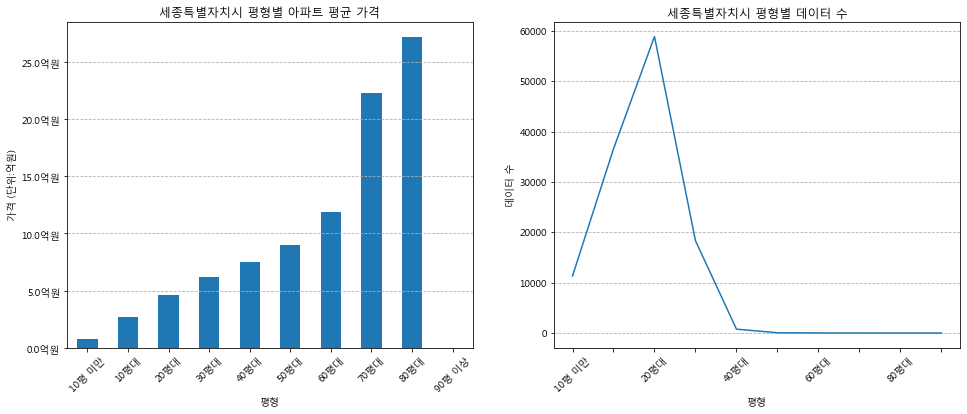

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


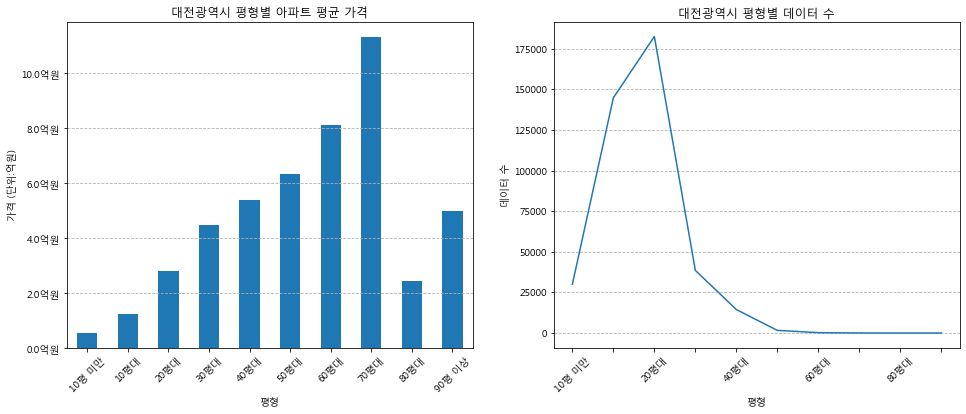

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


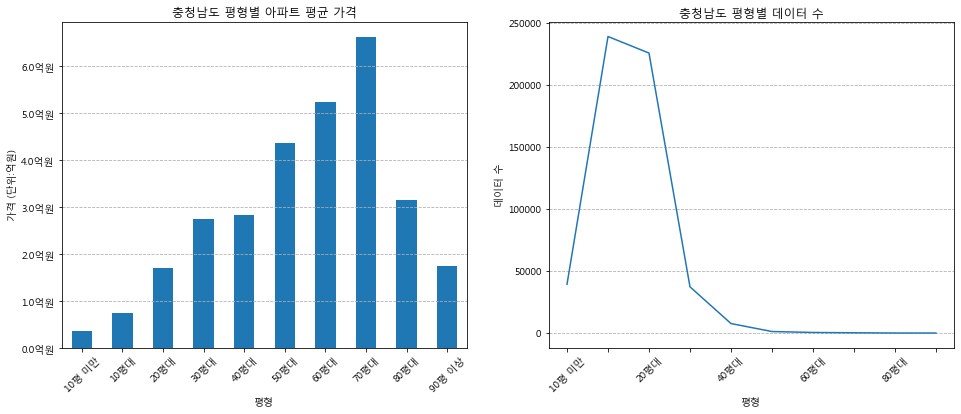

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


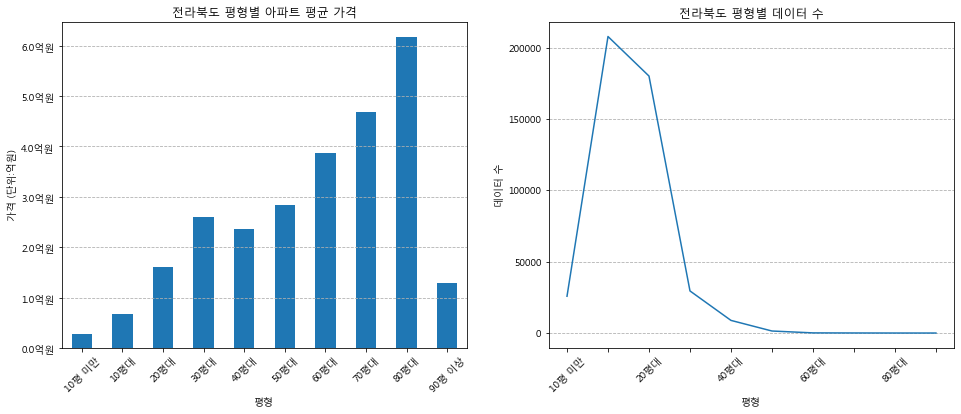

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


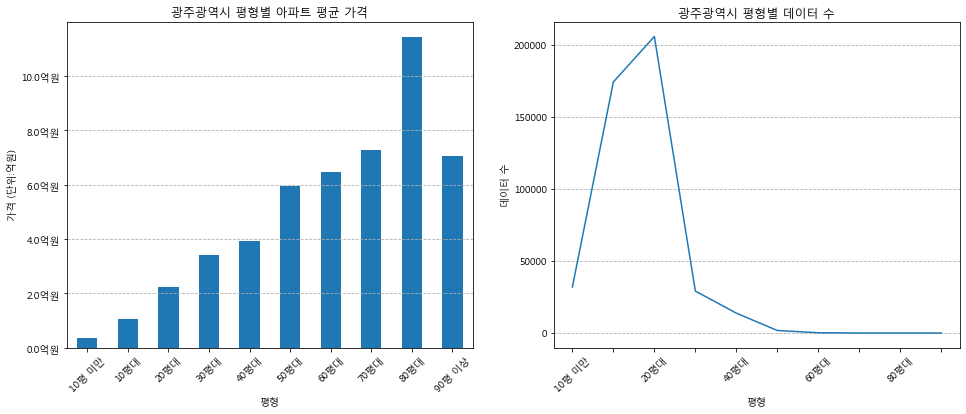

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


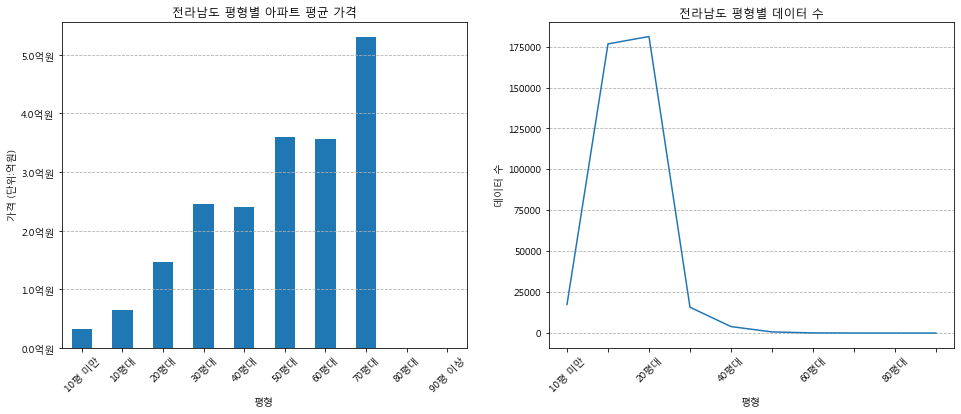

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


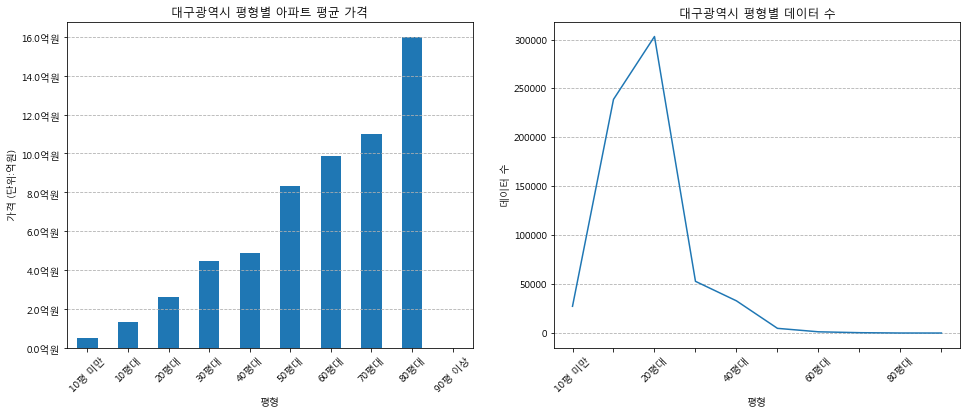

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


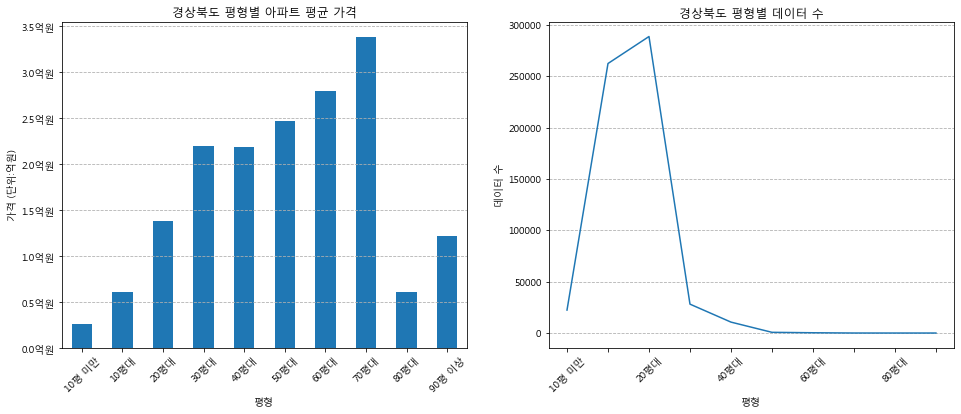

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


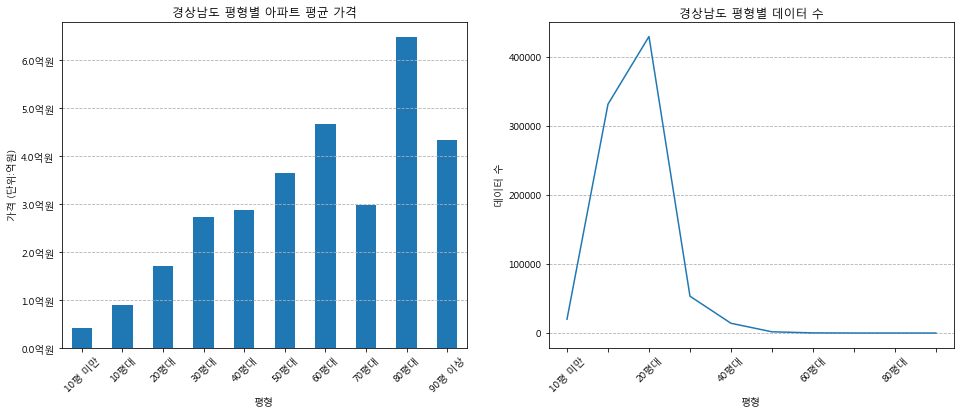

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


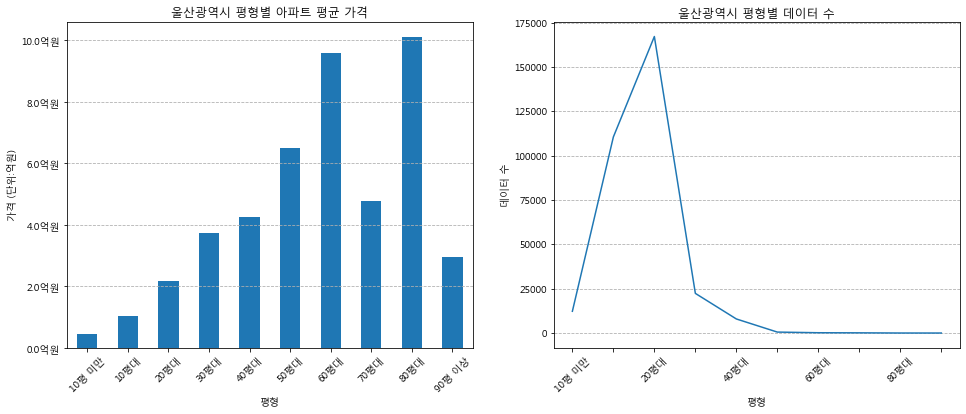

<ipython-input-12-f9b74b658e81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()


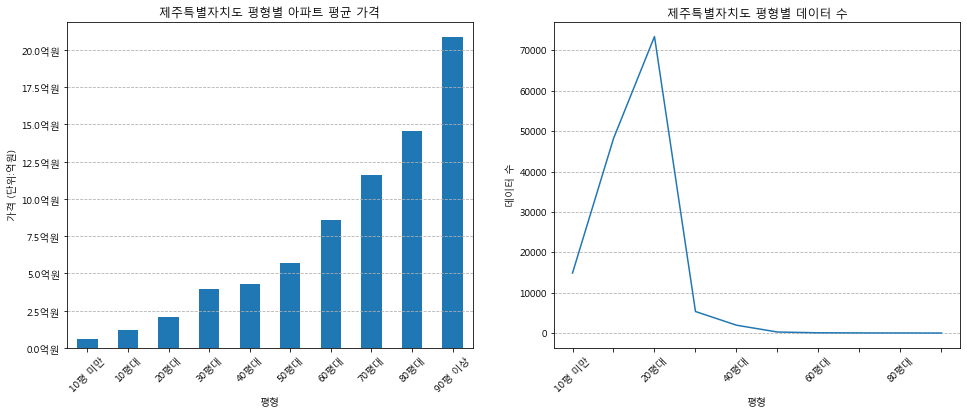

In [12]:
k=0
while k<17:
    df = df_apt_tot[df_apt_tot['시도'] == sido_list[k]].groupby('평형').mean().reset_index()
    fig, axs = plt.subplots(1, 2, figsize=(16,6))  # create a grid of subplots with 1 row and 2 columns
    # plot the graph on the first subplot
    graph = df.plot(kind='bar', x='평형', y='official_price', width=0.5, legend=None, ax=axs[0])
    graph.set_title(sido_list[k]+' 평형별 아파트 평균 가격')
    plt.rc('font', family="Malgun Gothic") 
    graph.set_ylabel('가격 (단위:억원)')
    graph.xaxis.set_tick_params(rotation=45, labelsize=10)
    graph.grid(True, axis='y', linestyle='--')
    graph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}억원'.format(x*1e-8)))
    
    # print the dataframe on the second subplot
    ex = df_apt_tot[df_apt_tot['시도'] == sido_list[k]]
    counts = ex['평형'].value_counts().sort_index()
    new_df = pd.DataFrame({'평형': counts.index, 'counts': counts.values})
    graph2 = new_df.plot(kind='line', x='평형', y='counts', legend=None, ax=axs[1])
    axs[1].set_title(sido_list[k]+' 평형별 데이터 수')
    axs[1].set_ylabel('데이터 수')
    axs[1].grid(True, axis='y', linestyle='--')
    graph2.xaxis.set_tick_params(rotation=45, labelsize=10)
    
    # Set the x-axis ticker to display every index
    axs[1].xaxis.set_major_locator(ticker.MaxNLocator(len(new_df.index)))

    plt.show()  # display the plot
    k=k+1
